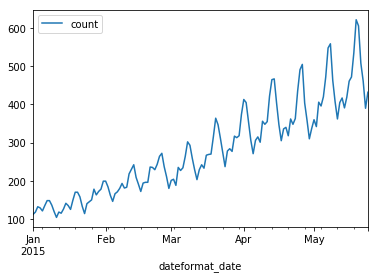

In [8]:
import pandas as pd
import math
from pandas import datetime
import matplotlib.pyplot as plt

def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')

data = pd.read_csv('2018.csv',index_col='dateformat_date', parse_dates=['dateformat_date'], date_parser=parser)
# visitors.drop('visit_date', axis=1, inplace=True)

data.plot()

In [9]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [10]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
train_data = data['2015-01-01':'2015-05-12']
test_data = data['2015-05-13':'2015-05-24']

In [12]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [14]:

print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 618.2055114707134 for model SARIMAX(3, 1, 0)x(3, 1, 1, 12)


In [15]:

# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

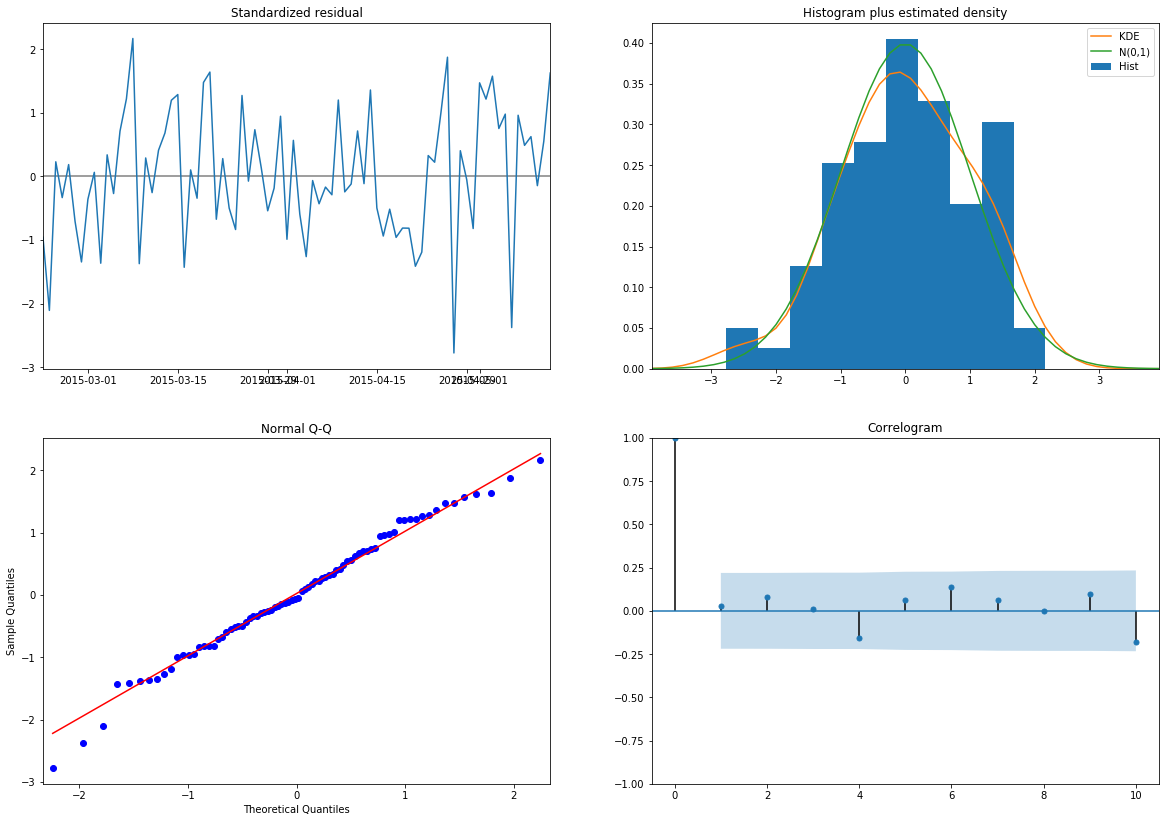

In [16]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

In [18]:

pred0 = results.get_prediction(start='2015-05-13', dynamic=False)
pred0_ci = pred0.conf_int()


In [19]:
pred1 = results.get_prediction(start='2015-05-13', dynamic=True)
pred1_ci = pred1.conf_int()

In [28]:
pred2 = results.get_forecast('2015-07-01')
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['2015-06-01':'2016-06-15'])

2015-06-01    695.559254
2015-06-02    578.965217
2015-06-03    518.068120
2015-06-04    465.574760
2015-06-05    508.938736
2015-06-06    528.063024
2015-06-07    500.878372
2015-06-08    572.711919
2015-06-09    561.068223
2015-06-10    592.351316
2015-06-11    662.163129
2015-06-12    750.778887
2015-06-13    766.152709
2015-06-14    640.585472
2015-06-15    576.663852
2015-06-16    521.085797
2015-06-17    565.829751
2015-06-18    586.427699
2015-06-19    556.482114
2015-06-20    632.250091
2015-06-21    620.400258
2015-06-22    654.570211
2015-06-23    728.143082
2015-06-24    822.095924
2015-06-25    838.565009
2015-06-26    704.500537
2015-06-27    637.392187
2015-06-28    578.960047
2015-06-29    625.456838
2015-06-30    647.252881
2015-07-01    614.565248
Freq: D, dtype: float64


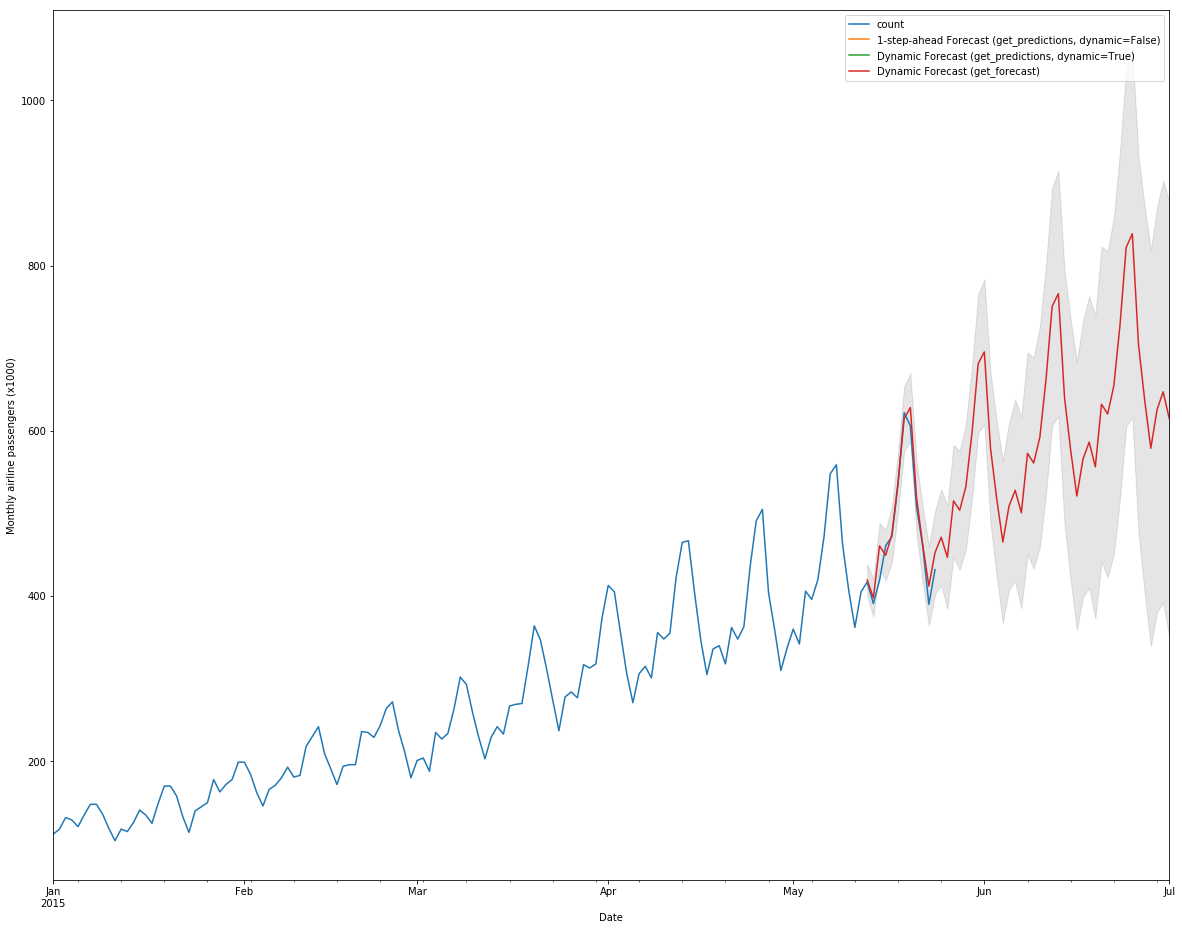

In [29]:
ax = data.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly airline passengers (x1000)')
plt.xlabel('Date')
plt.legend()
plt.show()

In [7]:
# import numpy as np
# ts_log = np.log(visitors)
# ts_log.plot()

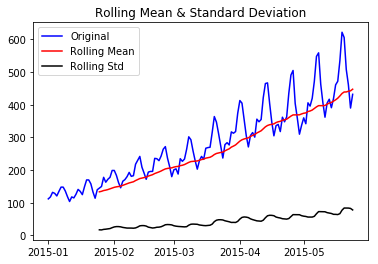

In [3]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=25).mean()
    rolstd = timeseries.rolling(window=25).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
test_stationarity(visitors)

In [9]:
x = visitors.values
train = x[0:72]
test = x[72:]
predictions = []

NameError: name 'itertools' is not defined

In [10]:
##  ARIMA MODEL

In [11]:
from statsmodels.tsa.arima_model import ARIMA

model_arima = ARIMA(x, order=(3,1,2))
model_arima_fit = model_arima.fit()

testList = []

predictions = model_arima_fit.forecast(steps=100)[0]
print (model_arima_fit.aic)

for t in test:
    testList.append(t[0])

print (predictions.tolist())
print ('Total Values ---> ',len(predictions))

45803.10622910225
[50641.9059639178, 51870.39072800033, 53591.218387894245, 54018.118161765095, 53942.920277087964, 54158.08458565309, 53974.212242852955, 54168.49400154507, 53977.30781907678, 54169.82208825317, 53978.144554048245, 54170.48653719238, 53978.80645345815, 54171.10155617101, 53979.455002818366, 54171.712865364854, 53980.10253564694, 54172.323898084134, 53980.74998830327, 54172.93491312603, 53981.39743169799, 54173.545930029206, 53982.044871196034, 54174.156950269244, 53982.69230720369, 54174.76797395705, 53983.33973975227, 54175.3790011004, 53983.98716884476, 54175.99003169928, 53984.634594481984, 54176.60106575308, 53985.28201666461, 54177.21210326114, 53985.92943539331, 54177.82314422281, 53986.576850668716, 54178.434188637446, 53987.2242624915, 54179.045236504375, 53987.87167086231, 54179.656287822945, 53988.519075781805, 54180.2673425925, 53989.166477250634, 54180.87840081239, 53989.81387526946, 54181.48946248196, 53990.46126983893, 54182.10052760055, 53991.10866095971

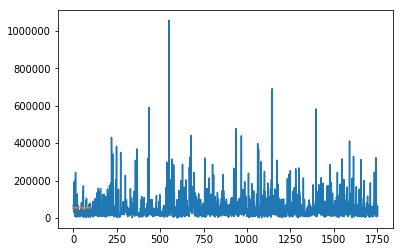

In [12]:
plt.plot(test)
plt.plot(predictions)

In [13]:
import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0,

In [ ]:
list1=[]
for p in pdq:
    try:
        model_arima = ARIMA(train, order=p)
        model_arima_fit = model_arima.fit()
        list1.append(model_arima_fit.aic)
        print(model_arima_fit.aic,'--->',p)
    except:
        continue

1788.892951856713 ---> (0, 0, 0)
1790.066666349129 ---> (0, 0, 1)
1790.7248056164965 ---> (0, 0, 2)
1792.2306073188931 ---> (0, 0, 3)
1792.4811765409327 ---> (0, 0, 4)
1794.3622820598944 ---> (0, 0, 5)
1795.447991888282 ---> (0, 0, 6)
1796.954787481872 ---> (0, 0, 7)
1798.431390375356 ---> (0, 0, 8)
1799.4212995449643 ---> (0, 0, 9)
1803.5355000923635 ---> (0, 1, 0)
1770.6958952213984 ---> (0, 1, 1)
1771.755972699154 ---> (0, 1, 2)
1772.2312197033077 ---> (0, 1, 3)
1853.6591985971743 ---> (0, 2, 0)
1785.3296752511683 ---> (0, 2, 1)
1789.89626687659 ---> (1, 0, 0)
1791.221429253241 ---> (1, 0, 1)
1787.1730999809536 ---> (1, 1, 0)
1771.5451251250588 ---> (1, 1, 1)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\tsatools.py:676: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\sonia_khatri\AppData\Roamin

1809.3487733154122 ---> (1, 2, 0)
1769.9473734571923 ---> (1, 2, 1)
1791.3795976407962 ---> (2, 0, 0)
1793.8225966846135 ---> (2, 0, 1)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1787.2335031657906 ---> (2, 1, 0)
nan ---> (2, 1, 1)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\tsatools.py:676: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:654: RuntimeWarning: invalid value encountered in log
  R_mat, T_mat)
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:654: RuntimeWarning: invalid value encountered in true_divide
  R_mat, T_mat)
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site

1774.6791276438728 ---> (2, 1, 2)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (2, 1, 3)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1777.7185935983537 ---> (2, 1, 4)
1797.7997530581229 ---> (2, 2, 0)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1770.35422528403 ---> (2, 2, 1)
1772.8661184434907 ---> (2, 2, 2)
1792.255470381582 ---> (3, 0, 0)
1791.567347241829 ---> (3, 0, 1)
1793.546400739933 ---> (3, 0, 2)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1796.846744435784 ---> (3, 0, 4)
1787.5382124863188 ---> (3, 1, 0)
1773.9291915947465 ---> (3, 1, 1)
1776.60236345699 ---> (3, 1, 2)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (3, 1, 3)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1780.094567236609 ---> (3, 1, 4)
1795.2764006401833 ---> (3, 2, 0)
1770.953746959881 ---> (3, 2, 1)
1793.0999491645523 ---> (4, 0, 0)
1794.9007369744984 ---> (4, 0, 1)
1794.8176212038115 ---> (4, 0, 2)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1795.5752789615235 ---> (4, 0, 3)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1792.888639674901 ---> (4, 0, 4)
1785.0825035698879 ---> (4, 1, 0)
1774.7842552579773 ---> (4, 1, 1)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\tsatools.py:676: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


nan ---> (4, 1, 2)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (4, 1, 3)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (4, 1, 4)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1775.0951389817383 ---> (4, 1, 5)
1788.5947183983978 ---> (4, 2, 0)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1768.9979226812122 ---> (4, 2, 1)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1763.0934754245138 ---> (4, 2, 2)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (4, 2, 3)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\tsatools.py:634: RuntimeWarning: invalid value encountered in log
  invarcoefs = -np.log((1-params)/(1+params))


1795.0943081918967 ---> (5, 0, 0)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1796.8930066313671 ---> (5, 0, 1)
1796.75208076779 ---> (5, 0, 2)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (5, 0, 3)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1794.732376698951 ---> (5, 0, 4)
1786.5805995829621 ---> (5, 1, 0)
1776.780613767451 ---> (5, 1, 1)
1778.2848190842137 ---> (5, 1, 2)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (5, 1, 3)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (5, 1, 4)
1786.9429368662843 ---> (5, 2, 0)
1770.6318836472774 ---> (5, 2, 1)
1795.7105575590365 ---> (6, 0, 0)
1796.1031025124717 ---> (6, 0, 1)
1794.2944575169058 ---> (6, 0, 2)
1796.1800810211553 ---> (6, 0, 3)
1797.5216493281305 ---> (6, 0, 4)
1799.5272409509762 ---> (6, 0, 5)
1787.39731294501 ---> (6, 1, 0)
1777.1922152539441 ---> (6, 1, 1)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1775.5589466719223 ---> (6, 1, 2)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (6, 1, 3)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (6, 1, 4)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\tsatools.py:674: RuntimeWarning: divide by zero encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\tsatools.py:676: RuntimeWarning: invalid value encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (6, 1, 5)
1786.6210776233997 ---> (6, 2, 0)
1771.6806506100288 ---> (6, 2, 1)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\tsatools.py:634: RuntimeWarning: divide by zero encountered in log
  invarcoefs = -np.log((1-params)/(1+params))


1797.1101736729383 ---> (7, 0, 0)
1798.0924575868066 ---> (7, 0, 1)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (7, 0, 2)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1805.551254382343 ---> (7, 0, 3)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1800.1539378982043 ---> (7, 0, 4)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1798.399538004026 ---> (7, 0, 5)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1798.8693612673615 ---> (7, 0, 6)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1799.9413042364813 ---> (7, 0, 7)
1788.0309864666672 ---> (7, 1, 0)
1778.2742612492077 ---> (7, 1, 1)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (7, 1, 2)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (7, 1, 3)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (7, 1, 4)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (7, 1, 5)
1786.8338828515807 ---> (7, 2, 0)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (7, 2, 1)
1798.716218161393 ---> (8, 0, 0)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (8, 0, 1)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (8, 0, 2)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (8, 0, 3)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (8, 0, 4)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1809.4897704359491 ---> (8, 0, 5)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1803.8608513292352 ---> (8, 0, 6)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1801.963762957701 ---> (8, 0, 7)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1803.366406732842 ---> (8, 0, 8)
1788.3465612210116 ---> (8, 1, 0)
1779.6345194452308 ---> (8, 1, 1)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (8, 1, 2)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (8, 1, 3)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1780.6190408873792 ---> (8, 1, 4)
1785.7798546879144 ---> (8, 2, 0)
1800.6257194657032 ---> (9, 0, 0)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (9, 0, 1)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (9, 0, 2)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (9, 0, 3)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (9, 0, 4)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (9, 0, 5)


C:\Users\sonia_khatri\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


nan ---> (9, 0, 6)


In [ ]:
print(len(list1))

In [ ]:
list1